# Modelling the corona virus


Goal is to prototype fast, and to get the app out there in shortest time.

## Data sources:

1. Kaggle https://www.kaggle.com/c/covid19-global-forecasting-week-1/discussion/137078
2. Google datasets https://datasetsearch.research.google.com/
3. Dolthub https://www.dolthub.com/repositories/Liquidata/corona-virus/data/master/case_details

In [1]:
import pandas as pd
import numpy as np

In [2]:
corona_df=pd.read_csv("covid19-case-details-2020-03-24.csv")

In [3]:
corona_df

,source,case_id,case_name,age,sex,nationality,current_status,symptomatic_date,confirmed_date,recovered_date,place_id
0,https://coronavirus-ph-api.now.sh/cases,1,"Traveled from Wuhan, China and Hong Kong. Wife...",38.0,F,Chinese,Recovered,NaN,2020-01-30 00:00:00,NaN,48
1,https://coronavirus-ph-api.now.sh/cases,2,"Traveled from Wuhan, China and Hong Kong; husb...",44.0,M,Chinese,Deceased,NaN,2020-02-02 00:00:00,NaN,48
2,https://coronavirus-ph-api.now.sh/cases,3,"Traveled from Wuhan, China. Tested negative fr...",60.0,F,Chinese,Recovered,NaN,2020-02-05 00:00:00,NaN,48
3,https://coronavirus-ph-api.now.sh/cases,4,"Identified as Atty. Carlo Navarro, an employee...",48.0,M,Filipino,Admitted,NaN,2020-03-05 00:00:00,NaN,48
4,https://coronavirus-ph-api.now.sh/cases,5,"Reported in San Juan, had no travel history ab...",62.0,M,Filipino,Deceased,NaN,2020-03-05 00:00:00,NaN,48
...,...,...,...,...,...,...,...,...,...,...,...
3710,https://www.wuhanvirus.sg/cases/search,554,24 Year Old Female Malaysian,24.0,F,Malaysian,In hospital,NaN,2020-03-24 00:00:00,NaN,29
3711,https://www.wuhanvirus.sg/cases/search,555,24 Year Old Male Singaporean,24.0,M,Singaporean,In hospital,NaN,2020-03-24 00:00:00,NaN,29
3712,https://www.wuhanvirus.sg/cases/search,556,27 Year Old Female British,27.0,F,British,In hospital,NaN,2020-03-24 00:00:00,NaN,29
3713,https://www.wuhanvirus.sg/cases/search,557,68 Year Old Male Singaporean,68.0,M,Singaporean,In hospital,NaN,2020-03-24 00:00:00,NaN,29


In [4]:
corona_df["current_status"].value_counts()

isolated       1791
In hospital     682
Admitted        481
released        307
Recovered       277
Deceased         41
deceased         32
Name: current_status, dtype: int64

Stupid assumption, but modelling does not matter here: Deceased+deceased+In hospital are all dead, rest is survived

In [5]:
corona_df.loc[corona_df["current_status"]=="Deceased","current_status"]="deceased"

In [6]:
corona_df.loc[corona_df["current_status"]=="In hospital","current_status"]="deceased"

In [7]:
corona_df.loc[corona_df["current_status"]=="isolated","current_status"]="Recovered"

In [8]:
corona_df.loc[corona_df["current_status"]=="Admitted","current_status"]="Recovered"

In [9]:
corona_df.loc[corona_df["current_status"]=="released","current_status"]="Recovered"

In [10]:
corona_df["current_status"].value_counts()

Recovered    2856
deceased      755
Name: current_status, dtype: int64

In [11]:
corona_df

,source,case_id,case_name,age,sex,nationality,current_status,symptomatic_date,confirmed_date,recovered_date,place_id
0,https://coronavirus-ph-api.now.sh/cases,1,"Traveled from Wuhan, China and Hong Kong. Wife...",38.0,F,Chinese,Recovered,NaN,2020-01-30 00:00:00,NaN,48
1,https://coronavirus-ph-api.now.sh/cases,2,"Traveled from Wuhan, China and Hong Kong; husb...",44.0,M,Chinese,deceased,NaN,2020-02-02 00:00:00,NaN,48
2,https://coronavirus-ph-api.now.sh/cases,3,"Traveled from Wuhan, China. Tested negative fr...",60.0,F,Chinese,Recovered,NaN,2020-02-05 00:00:00,NaN,48
3,https://coronavirus-ph-api.now.sh/cases,4,"Identified as Atty. Carlo Navarro, an employee...",48.0,M,Filipino,Recovered,NaN,2020-03-05 00:00:00,NaN,48
4,https://coronavirus-ph-api.now.sh/cases,5,"Reported in San Juan, had no travel history ab...",62.0,M,Filipino,deceased,NaN,2020-03-05 00:00:00,NaN,48
...,...,...,...,...,...,...,...,...,...,...,...
3710,https://www.wuhanvirus.sg/cases/search,554,24 Year Old Female Malaysian,24.0,F,Malaysian,deceased,NaN,2020-03-24 00:00:00,NaN,29
3711,https://www.wuhanvirus.sg/cases/search,555,24 Year Old Male Singaporean,24.0,M,Singaporean,deceased,NaN,2020-03-24 00:00:00,NaN,29
3712,https://www.wuhanvirus.sg/cases/search,556,27 Year Old Female British,27.0,F,British,deceased,NaN,2020-03-24 00:00:00,NaN,29
3713,https://www.wuhanvirus.sg/cases/search,557,68 Year Old Male Singaporean,68.0,M,Singaporean,deceased,NaN,2020-03-24 00:00:00,NaN,29


In [12]:
train_df_ready=corona_df[["current_status","age","sex"]]

In [13]:
train_df_ready

,current_status,age,sex
0,Recovered,38.0,F
1,deceased,44.0,M
2,Recovered,60.0,F
3,Recovered,48.0,M
4,deceased,62.0,M
...,...,...,...
3710,deceased,24.0,F
3711,deceased,24.0,M
3712,deceased,27.0,F
3713,deceased,68.0,M


In [14]:
def prepare_data_for_model(raw_dataframe, target_columns, drop_first = False, make_na_col = False):
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)

# create dummy features 
train_df_ready = prepare_data_for_model(train_df_ready, target_columns=['sex'])
train_df_ready = train_df_ready.dropna() 
train_df_ready.head()

,current_status,age,sex_F,sex_M
0,Recovered,38.0,1,0
1,deceased,44.0,0,1
2,Recovered,60.0,1,0
3,Recovered,48.0,0,1
4,deceased,62.0,0,1


In [15]:
train_df_ready['current_status'] = (train_df_ready['current_status'] == 'deceased').astype(int)

In [16]:
train_df_ready.head()

,current_status,age,sex_F,sex_M
0,0,38.0,1,0
1,1,44.0,0,1
2,0,60.0,1,0
3,0,48.0,0,1
4,1,62.0,0,1


Actual modelling:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
gbm_model = GradientBoostingClassifier(random_state=10, learning_rate=0.1, max_depth=10)

In [19]:
features = [feat for feat in list(train_df_ready) if feat != 'current_status']


gbm_model.fit(train_df_ready[features], np.ravel(train_df_ready[['current_status']]))

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(train_df_ready[features], 
                                                 train_df_ready[['current_status']], 
                                                 test_size=0.5, 
                                                 random_state=42)

print ('Accuracy: %f' % gbm_model.score(X_test,y_test))

Accuracy: 0.757921


In [20]:
import pickle

Actual modelling with differential privacy:

In [21]:

import diffprivlib.models as dp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(solver="lbfgs"))
])

In [22]:
lr.fit(X_train, y_train)

C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [23]:
from sklearn.metrics import accuracy_score

print("Non-private test accuracy: %.2f%%" % (accuracy_score(y_test, lr.predict(X_test)) * 100))

Non-private test accuracy: 75.54%


In [24]:

dp_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', dp.LogisticRegression())
])

dp_lr.fit(X_train, y_train)

C:\Users\Noah\Anaconda3\lib\site-packages\diffprivlib\models\logistic_regression.py:218: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 LogisticRegression(C=1.0, data_norm=1.4142135623730951,
                                    epsilon=1.0, fit_intercept=True,
                                    max_iter=100, n_jobs=None, tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

In [25]:
print("Agreement between non-private and differentially private (epsilon=inf) classifiers: %.2f%%" % 
     (accuracy_score(lr.predict(X_test), dp_lr.predict(X_test)) * 100))

Agreement between non-private and differentially private (epsilon=inf) classifiers: 100.00%


In [26]:
accuracy = [accuracy_score(y_test, lr.predict(X_test))]
epsilons = np.logspace(-3, 1, 500)

for eps in epsilons:
    dp_lr.set_params(clf__epsilon=eps).fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, dp_lr.predict(X_test)))

C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Noah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [27]:
dp_lr_dump = pickle.dumps(dp_lr)


In [28]:
gbm_model = pickle.load(open("gbm_model_dump.p", "rb" ))
 
preds = gbm_model.predict_proba(X_test)
preds


array([[0.93893524, 0.06106476],
       [0.75759987, 0.24240013],
       [0.87524084, 0.12475916],
       ...,
       [0.84846269, 0.15153731],
       [0.75801779, 0.24198221],
       [0.70870887, 0.29129113]])

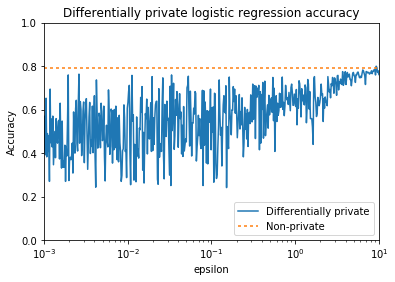

In [30]:
import matplotlib.pyplot as plt
import pickle

epsilons, accuracy = pickle.load(open("lr_accuracy_500.p", "rb"))

plt.semilogx(epsilons, accuracy[1:], label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * accuracy[0], dashes=[2,2], label="Non-private")
plt.title("Differentially private logistic regression accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=4)
plt.show()